In [2]:
import argparse
# from core.base_dataset import BaseDataset
# from models.metric import inception_score
import glob
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate
import json

In [3]:
dst = r"..\repos\Palette\experiments\train_BPv8_complete_6\results\test\53"
src = r"..\data\processed\BP_npy\0325_256_corr\p00\scale_train.npy"
test = r"..\data\processed\BP_npy\0325_256_corr\p00\test.npy"

In [14]:
def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)
def create_plots(x,y):
    n=4
    x *= 200
    y *= 200
    fig,axes = plt.subplots(2,n,figsize=(10,5),tight_layout=True)
    for i in range(n):
        axes[0,i].plot(x[i,:])
        axes[1,i].plot(y[i,:])
    plt.show()
    plt.close()
    

In [65]:
def error_report(errors):
    n_samples = errors.shape[1]
    print("n_samples:",n_samples)
    me = np.mean(errors,axis=1)
    mae = np.mean(np.abs(errors),axis=1)
    rmse = np.sqrt(np.mean(errors**2,axis=1))
    std = np.std(errors,axis=1)
    print(me.shape,mae.shape,rmse.shape,std.shape)
    error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
    error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
    error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100
    print("""
        test data samples:
        # samples : {}
        
        Eval Stats:   DBP    SBP
        MAE:        {:6.3f} {:6.3f}
        RMSE:       {:6.3f} {:6.3f}
        Mean Error: {:6.3f} {:6.3f}
        STD:        {:6.3f} {:6.3f}
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        SBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
        DBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
        
        
        """.format(
        n_samples,
        *mae,
        *rmse,
        *me,
        *std,
        error_5[0], error_10[0], error_15[0],
        error_5[1], error_10[1], error_15[1],
        ))

# old

In [546]:
n_patients = 0
errors = []
gt = []
cond= []
out = []
scales = np.load(src)
print("aaaa",scales.shape,scales[:10])
# for i in p0n_dir:
gt_files = glob.glob(f"{dst}\GT_*.npy")
cond_files = glob.glob(f"{dst}\Process_*.npy")
out_files = glob.glob(f"{dst}\OUT_*.npy")
for j in tqdm(range(len(gt_files))):
    # output = np.load(os.path.join(file,args.dst))
    gt.append(np.load(os.path.join(gt_files[j])))
    # plt.plot(gt[0,:])
    # plt.show()
    cond.append(np.load(os.path.join(cond_files[j])))
    out.append(np.load(os.path.join(out_files[j])))
    # print(gt.shape,out.shape,gt.dtype)
    # calc min and max"
    if j % 50 == 0:
        # create_plots(gt,out)
        pass
print(gt[-1].shape)
out = np.concatenate(out,axis=0)
gt = np.concatenate(gt,axis=0)
scales = scales[:out.shape[0]]
gt[:] -= scales[:,0][:, None]
gt[:] /= scales[:,1][:, None]
out[:] -= scales[:,0][:, None]
out[:] /= scales[:,1][:, None]
cond = np.load(test)[:,:,1]
print(cond.shape)
# cond = np.concatenate(cond,axis=0)
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))
headers = ["Signal", "Mean","Std"]
table = [["data_ppg", 0.494153162946643,0.10694360087091538],
        ]
table.append(["cond_ppg",cond_mean,cond_std])
table.append( ["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))
# print(gt_mean,gt_std,out_mean,out_std,cond_mean,cond_std)
# print(gt.shape,out.shape)
# out = (out-out_mean)/out_std*0.1349+0.396
# out = (out-out_mean)/out_std*gt_std+gt_mean
gt_min,gt_max = calc_min_max(gt)
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_min,out_max = calc_min_max(out)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max

aaaa (22737, 2) [[-0.90958691  0.01595737]
 [-0.90958691  0.01595737]
 [-0.874034    0.01582172]
 [-0.874034    0.01582172]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]
 [-0.98033045  0.01610803]]


100%|██████████| 46/46 [00:00<00:00, 1956.18it/s]

(500, 256)
(22737, 256)
0
Signal       Mean      Std
--------  -------  -------
data_ppg   0.4942   0.1069
cond_ppg   0.4135   0.0352
data_abp   0.3959   0.1349
gt        89.4375  11.9184
out       86.5625  11.3365


# new v3

In [25]:
src = r"..\repos\Palette\experiments\train_BPv8_complete_5"
epoch = 63 
epoch = str(epoch)

### load
- scales at data dir
- output 
    - gt (abp)
    - out (abp)
    - cond (ppg)
- (optional)train at data dir

In [ ]:
with open(os.path.join(src,"config.json"), "r") as file:
    json_data = json.load(file)

scale_dir = json_data["datasets"]["train"]["which_dataset"]["args"]["data_root"]
print(scale_dir)
train = np.load(os.path.join(r"..\repos\Palette",scale_dir,"train.npy"))
train_ppg = train[:,:,1]
train = train[:,:,0]
scales = np.load(os.path.join(r"..\repos\Palette",scale_dir,"scale_train.npy"))
result_dir = os.path.join(src,"results","test",epoch)
gt = []
cond= []
out = []
gt_files = glob.glob(f"{result_dir}\GT_*.npy")
cond_files = glob.glob(f"{result_dir}\Process_*.npy")
out_files = glob.glob(f"{result_dir}\OUT_*.npy")
for j in tqdm(range(len(gt_files))):
    gt.append(np.load(os.path.join(gt_files[j])))
    cond.append(np.load(os.path.join(cond_files[j])))
    out.append(np.load(os.path.join(out_files[j])))
print(gt[-1].shape)
out = np.concatenate(out,axis=0)
gt = np.concatenate(gt,axis=0)
cond = np.concatenate(cond,axis=0)

In [ ]:
def average(arr):
    return 

### vae

In [60]:
scales = np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\scale_train.npy")
train  =np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\train.npy")
train_ppg = train[:,:,1]
train = train[:,:,0]
cond  = np.load(r"..\data\processed\BP_npy\0325_256_corr_clean\p00\test.npy")[:,:,1]
arr = np.load(r".\outputs\0531_bp\output.npz")
out = np.average(arr['out'],axis=1)
gt = np.average(arr['gt'],axis=1)
scales.shape,out.shape,gt.shape,arr

((1, 2),
 (2000, 256),
 (2000, 256),
 NpzFile '.\\outputs\\0531_bp\\output.npz' with keys: out, gt)

In [61]:


scales = scales[:out.shape[0]]
print(scales.shape,gt.shape,out.shape,scales)
# 正規化を元に戻す
train[:] -= scales[:,0][:, None]
train[:] /= scales[:,1][:, None]
gt[:] -= scales[:,0][:, None]
gt[:] /= scales[:,1][:, None]
out[:] -= scales[:,0][:, None]
out[:] /= scales[:,1][:, None]
train_mean = np.mean(train.flatten())
train_ppg_mean = np.mean(train_ppg.flatten())
train_ppg_std = np.std(train_ppg.mean(axis=1),dtype=np.float64)
train_std = np.mean(np.std(train.mean(axis=1),dtype=np.float64))
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
cond_mean = np.mean(cond.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
cond_std = np.std(cond.mean(axis=1),dtype=np.float64)
print(np.count_nonzero(np.isnan(out)))

headers = ["Signal", "Mean","Std"]
table=[]
table.append(["train_ppg",train_ppg_mean,train_ppg_std])
table.append(["cond_ppg",cond_mean,cond_std])
table.append(["train",train_mean,train_std])
# table.append(["data_ppg", 0.494153162946643,0.10694360087091538])
# table.append(["data_abp",0.39593121533751857,0.13489903083932583])
table.append(["gt",gt_mean,gt_std])
table.append(["out",out_mean,out_std])
print(tabulate(table,headers, floatfmt=".4f"))


(1, 2) (2000, 256) (2000, 256) [[-0.38464342  0.00769287]]
0
Signal         Mean      Std
---------  --------  -------
train_ppg    0.4198   0.0153
cond_ppg     0.4213   0.0133
train       87.1363  13.1000
gt         104.7180   1.6972
out        105.2349   1.7708


In [62]:
# 血圧の最大値(SBP)最小値(DBP)を計算
gt_min,gt_max = calc_min_max(gt)
out_min,out_max = calc_min_max(out)
gt_min,gt_max = calc_min_max(gt)
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_min,out_max = calc_min_max(out)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)
# print(out_max.shape,out_max[:10])
errors = np.zeros((2,*out_min.shape))
# print(error.shape)
errors[0,:]=gt_min-out_min
errors[1,:]=gt_max-out_max

In [64]:
error_report(errors)

n_samples: 2000
(2,) (2,) (2,) (2,)

        test data samples:
        # samples : 2000
        
        Eval Stats:   DBP    SBP
        MAE:         3.879  3.769
        RMSE:        5.064  4.834
        Mean Error: -2.992  1.276
        STD:         4.086  4.662
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        SBP      71.0%   95.5%   98.8%
        DBP      71.9%   95.2%   99.6%
        
        
        


### 0513: バイアス調整
1. train, test(gt), out のDBP, SBPの平均値を計算
2. out = out-(mean_sbp(train) - mean_sbp(test))
3. 誤差計算

In [9]:
def rescale(arr,scales):
    arr[:] -= scales[:,0]
    arr[:] /= scales[:,1]
    return arr

In [29]:

train_dbp = np.min(train,axis=1)
train_sbp = np.max(train,axis=1)
print(train.shape,train_sbp.shape,train_dbp.shape)

headers = ["Signal", "DBP","SBP"]
table=[]
table.append(["train",train_dbp.mean(),train_sbp.mean()])
table.append(["gt",gt_min.mean(),gt_max.mean()])
table.append(["out",out_min.mean(),out_max.mean()])
print(tabulate(table,headers, floatfmt=".4f"))

(381088, 256) (381088,) (381088,)
Signal        DBP       SBP
--------  -------  --------
train     64.2973  130.3282
gt        65.8750  130.1250
out       64.2500  133.0000


In [30]:
diff =train_sbp.mean()- gt_max.mean()
out_max2 = out_max- diff
out_min2 =out_min - diff
errors2 = np.zeros((2,*out_min.shape))
# print(error.shape)
errors2[0,:]=gt_min-out_min2
errors2[1,:]=gt_max-out_max2

In [31]:
error_report(errors2)

n_samples: 86272
(2,) (2,) (2,) (2,)

        test data samples:
        # samples : 86272
        
        Eval Stats:   DBP    SBP
        MAE:         9.623 19.987
        RMSE:       12.647 24.982
        Mean Error:  1.809 -2.689
        STD:        12.517 24.837
        
        BHS standards range:
        Error   <5mmHg <10mmHg <15mmHg
        gradeA     60%     85%     95%
        gradeB     50%     75%     90%
        gradeC     40%     65%     85%
        SBP      36.0%   62.5%   78.7%
        DBP      15.9%   30.9%   45.1%
        
        
        


# error histogram

In [28]:
np.max(errors[0]),np.min(errors[0]),np.max(errors[1]),np.min(errors[1])

(50.78125, -122.5625, 86.6875, -92.3125)

(array([   34.,   140.,  1078.,  4319.,  8109., 12970., 15342., 15955.,
        12794.,  7898.,  3953.,  2136.,  1021.,   456.,    67.]),
 array([-86.6875    , -74.90416667, -63.12083333, -51.3375    ,
        -39.55416667, -27.77083333, -15.9875    ,  -4.20416667,
          7.57916667,  19.3625    ,  31.14583333,  42.92916667,
         54.7125    ,  66.49583333,  78.27916667,  90.0625    ]),
 <BarContainer object of 15 artists>)

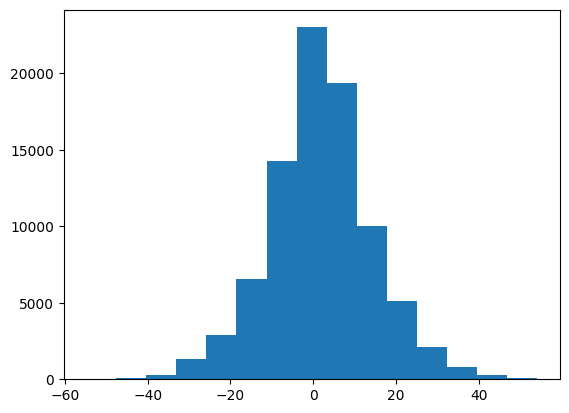

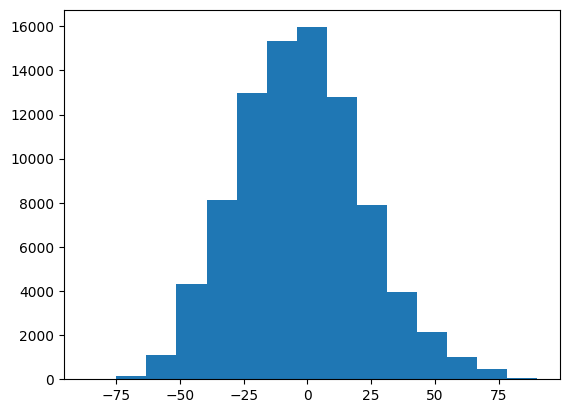

In [21]:
plt.hist(errors[0],bins=15)
plt.figure()
plt.hist(errors[1],bins=15)

## plot 

1066


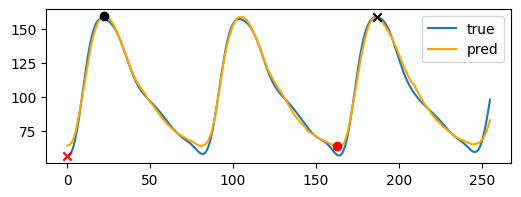

In [66]:
i = np.random.randint(2000)
# i = 14325
plt.figure(figsize=(6,2))
# plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
# plt.plot(cond[i],c='green',label='ppg')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')
# plt.legend(loc='lower right')
print(i)
i = np.random.randint(20000)
# i = 11805
# \
# plt.subplot(133)
# plt.plot(gt[i],label='true')
# plt.plot(out[i],c='orange',label='pred')
# plt.legend(loc='upper right')
# plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
# plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
# plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
# plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)

## ppg

In [56]:
arr = np.load(r".\outputs\0531\output.npz")
gt = arr['gt']
out = arr['out']
gt = np.average(gt,axis=1)
out = np.average(out,axis=1)
mse = np.mean(np.power(out-gt,2))
mae = np.mean(np.abs(out-gt))
print(gt.shape,out.shape)
print("mse:",mse,", mae:",mae)

(2000, 256) (2000, 256)
mse: 0.0020986763 , mae: 0.033231393


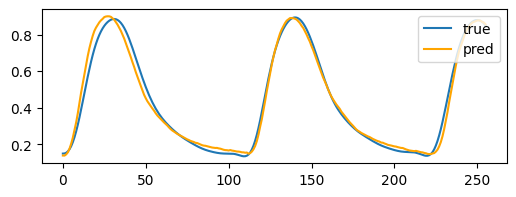

In [59]:
i = np.random.randint(2000)
# i = 14325
plt.figure(figsize=(6,2))
# plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
plt.legend(loc='upper right')

22720
29


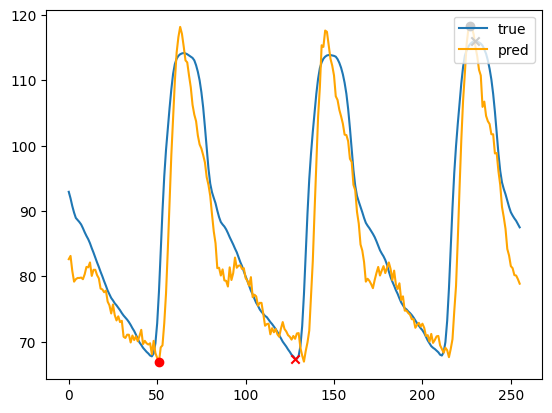

In [557]:
asa = np.where(np.mean(out,axis=1)>0.8)[0]
print(len(asa))
i = asa[np.random.randint(56)]
print(i)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
# plt.plot(cond[i],c='green',label='ppg')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='upper right')

(-12.75, 267.75, 0.08003575607766494, 0.8628810271874068)

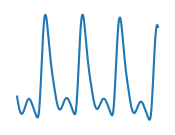

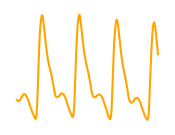

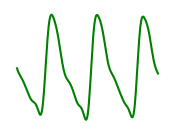

In [574]:
i = 14325
plt.figure(figsize=(2,1.5))
plt.plot(gt[i],label='true')
# plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
# plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.axis("off")
plt.figure(figsize=(2,1.5))
plt.plot(out[i],c='orange',label='pred')
# plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
# plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.axis("off")
out_max[i],out_min[i]
plt.figure(figsize=(2,1.5))
plt.plot(cond[i],c='green',label='pred')
plt.axis("off")

(-12.75, 267.75, -3.304463303360795, 2.7091664651332072)

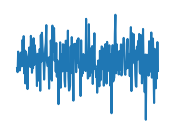

In [573]:
plt.figure(figsize=(2,1.5))
plt.plot(np.random.randn(256),label='pred')
plt.axis("off")

## visualize validation loss from logfile

In [1]:
def read_logfile(path):
    key = 'val/mae: '
    with open(path) as f:
        lines = f.readlines()

    # 改行コードを削除したリストを作成
    lines_strip = [line.strip() for line in lines]

    # "test"を含む行を抽出
    list_test = [line_s for line_s in lines_strip if key in line_s]

    # "test"以降の文字列を表示
    for i in range(len(list_test)):
        index = list_test[i].find(key) + len(key)
        list_test[i] = list_test[i][index:]
        list_test[i] = float(list_test[i])
    return list_test

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
path = r"../repos/Palette/experiments/train_ppg2abp_1DBP_v8_240411_132353/train.log"
a = read_logfile(path)
# path2 = r"../repos/Palette/experiments/test_ppg2abp_1DBP_v8_iter_240325_151104/test.log"
# b = read_logfile(path2)
# a.extend(b)

In [3]:
np.argmin(a)+1,np.min(a)

(218, 0.09724119305610657)

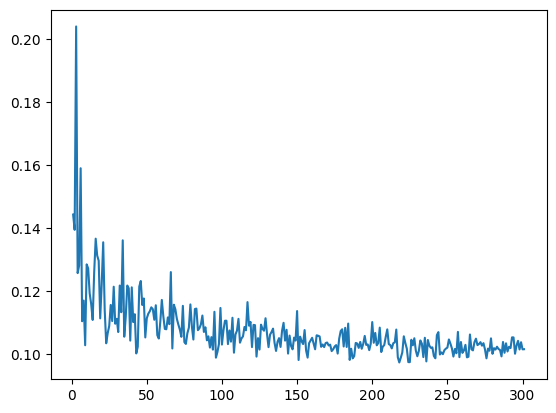

In [4]:
plt.plot(np.arange(1,len(a)+1,1),a)


In [6]:
np.sort(np.argsort(a)[:20]+1,np.sort(np.argsort(a)[:20]+1)

(array([218, 225, 224, 236, 151, 185, 187, 276, 242, 219,  96, 157, 263,
        217, 258, 234, 264, 123, 254, 286], dtype=int64),
 array([ 96, 123, 151, 157, 185, 187, 217, 218, 219, 224, 225, 234, 236,
        242, 254, 258, 263, 264, 276, 286], dtype=int64))